## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

%matplotlib inline
# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
# os.environ["CUDA_VISIBLE_DEVICES"] = '0'

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
x_train.shape

(50000, 3072)

In [5]:
y_train.shape

(50000, 10)

In [6]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(512, activation='relu')(input_layer)
    x = keras.layers.Dense(256, activation='relu')(x)
    x = keras.layers.Dense(128, activation='relu')(x)
    x = keras.layers.Dense(64, activation='relu')(x)
    out = keras.layers.Dense(10, activation='softmax')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model

### 將epochs增加到500

In [7]:
"""
Compile 模型
"""
model = build_mlp()
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.9320 - acc: 0.2960 - val_loss: 1.7758 - val_acc: 0.3590
Epoch 2/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.7199 - acc: 0.3824 - val_loss: 1.6412 - val_acc: 0.4087
Epoch 3/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.6172 - acc: 0.4214 - val_loss: 1.6058 - val_acc: 0.4232
Epoch 4/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.5585 - acc: 0.4414 - val_loss: 1.6848 - val_acc: 0.4013
Epoch 5/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.5153 - acc: 0.4585 - val_loss: 1.4821 - val_acc: 0.4693
Epoch 6/500
50000/50000 [==============================] - 4s 70us/step - loss: 1.4775 - acc: 0.4725 - val_loss: 1.4790 - val_acc: 0.4701
Epoch 7/500
50000/50000 [==============================] - 3s 64us/step - 

50000/50000 [==============================] - 3s 61us/step - loss: 0.5845 - acc: 0.7886 - val_loss: 1.9936 - val_acc: 0.5037
Epoch 58/500
50000/50000 [==============================] - 3s 61us/step - loss: 0.5722 - acc: 0.7944 - val_loss: 2.0575 - val_acc: 0.5045
Epoch 59/500
50000/50000 [==============================] - 3s 61us/step - loss: 0.5660 - acc: 0.7956 - val_loss: 2.0047 - val_acc: 0.5054
Epoch 60/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.5701 - acc: 0.7932 - val_loss: 2.0805 - val_acc: 0.5112
Epoch 61/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.5318 - acc: 0.8097 - val_loss: 2.1589 - val_acc: 0.5003
Epoch 62/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.5173 - acc: 0.8129 - val_loss: 2.1340 - val_acc: 0.5070
Epoch 63/500
50000/50000 [==============================] - 3s 61us/step - loss: 0.5250 - acc: 0.8109 - val_loss: 2.1063 - val_acc: 0.5142
Epoch 64/500
50000/50000 [==============

50000/50000 [==============================] - 3s 61us/step - loss: 0.2966 - acc: 0.8937 - val_loss: 3.3191 - val_acc: 0.4931
Epoch 116/500
50000/50000 [==============================] - 3s 61us/step - loss: 0.2726 - acc: 0.9004 - val_loss: 3.3863 - val_acc: 0.4874
Epoch 117/500
50000/50000 [==============================] - 3s 61us/step - loss: 0.2731 - acc: 0.9021 - val_loss: 3.3559 - val_acc: 0.4993
Epoch 118/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.2270 - acc: 0.9185 - val_loss: 3.3052 - val_acc: 0.4974
Epoch 119/500
50000/50000 [==============================] - 3s 63us/step - loss: 0.2442 - acc: 0.9125 - val_loss: 3.3916 - val_acc: 0.4922
Epoch 120/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.2868 - acc: 0.8987 - val_loss: 3.5424 - val_acc: 0.4862
Epoch 121/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.2580 - acc: 0.9074 - val_loss: 3.4202 - val_acc: 0.4915
Epoch 122/500
50000/50000 [=======

50000/50000 [==============================] - 4s 71us/step - loss: 0.1636 - acc: 0.9411 - val_loss: 4.0124 - val_acc: 0.4940
Epoch 174/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.1960 - acc: 0.9310 - val_loss: 4.0626 - val_acc: 0.4936
Epoch 175/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.2726 - acc: 0.9094 - val_loss: 3.9640 - val_acc: 0.4848
Epoch 176/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.1613 - acc: 0.9426 - val_loss: 4.0811 - val_acc: 0.4983
Epoch 177/500
50000/50000 [==============================] - 3s 61us/step - loss: 0.1533 - acc: 0.9446 - val_loss: 4.0587 - val_acc: 0.4985
Epoch 178/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.1713 - acc: 0.9392 - val_loss: 4.0220 - val_acc: 0.4924
Epoch 179/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.1737 - acc: 0.9402 - val_loss: 4.0743 - val_acc: 0.4944
Epoch 180/500
50000/50000 [=======

50000/50000 [==============================] - 3s 62us/step - loss: 0.0849 - acc: 0.9704 - val_loss: 4.3805 - val_acc: 0.4914
Epoch 232/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.1102 - acc: 0.9613 - val_loss: 4.2921 - val_acc: 0.4959
Epoch 233/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.1137 - acc: 0.9597 - val_loss: 4.6767 - val_acc: 0.4871
Epoch 234/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.1847 - acc: 0.9376 - val_loss: 4.3423 - val_acc: 0.4921
Epoch 235/500
50000/50000 [==============================] - 3s 61us/step - loss: 0.1508 - acc: 0.9489 - val_loss: 4.3869 - val_acc: 0.4939
Epoch 236/500
50000/50000 [==============================] - 3s 61us/step - loss: 0.1240 - acc: 0.9573 - val_loss: 4.3782 - val_acc: 0.4953
Epoch 237/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.1401 - acc: 0.9512 - val_loss: 4.5359 - val_acc: 0.4895
Epoch 238/500
50000/50000 [=======

50000/50000 [==============================] - 3s 62us/step - loss: 0.0942 - acc: 0.9677 - val_loss: 4.6750 - val_acc: 0.4922
Epoch 290/500
50000/50000 [==============================] - 3s 61us/step - loss: 0.0765 - acc: 0.9747 - val_loss: 4.6978 - val_acc: 0.4885
Epoch 291/500
50000/50000 [==============================] - 3s 61us/step - loss: 0.1514 - acc: 0.9509 - val_loss: 4.7351 - val_acc: 0.4921
Epoch 292/500
50000/50000 [==============================] - 3s 61us/step - loss: 0.1078 - acc: 0.9642 - val_loss: 4.6538 - val_acc: 0.4905
Epoch 293/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.1243 - acc: 0.9572 - val_loss: 4.6273 - val_acc: 0.4916
Epoch 294/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.1037 - acc: 0.9643 - val_loss: 4.6523 - val_acc: 0.4938
Epoch 295/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.1390 - acc: 0.9539 - val_loss: 4.7221 - val_acc: 0.4924
Epoch 296/500
50000/50000 [=======

50000/50000 [==============================] - 3s 64us/step - loss: 0.1717 - acc: 0.9447 - val_loss: 4.8595 - val_acc: 0.4832
Epoch 348/500
50000/50000 [==============================] - 3s 64us/step - loss: 0.1434 - acc: 0.9528 - val_loss: 4.7834 - val_acc: 0.4866
Epoch 349/500
50000/50000 [==============================] - 3s 66us/step - loss: 0.0623 - acc: 0.9798 - val_loss: 4.7581 - val_acc: 0.4983
Epoch 350/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.0433 - acc: 0.9856 - val_loss: 4.8963 - val_acc: 0.4896
Epoch 351/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.0861 - acc: 0.9703 - val_loss: 4.8806 - val_acc: 0.4876
Epoch 352/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.1637 - acc: 0.9481 - val_loss: 4.7517 - val_acc: 0.4876
Epoch 353/500
50000/50000 [==============================] - 3s 62us/step - loss: 0.0984 - acc: 0.9673 - val_loss: 4.7979 - val_acc: 0.4986
Epoch 354/500
50000/50000 [=======

50000/50000 [==============================] - 3s 59us/step - loss: 0.1229 - acc: 0.9598 - val_loss: 4.9924 - val_acc: 0.4940
Epoch 406/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.0973 - acc: 0.9681 - val_loss: 4.9875 - val_acc: 0.4876
Epoch 407/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.1157 - acc: 0.9620 - val_loss: 4.8619 - val_acc: 0.4959
Epoch 408/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.0614 - acc: 0.9797 - val_loss: 4.8954 - val_acc: 0.4970
Epoch 409/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.0689 - acc: 0.9774 - val_loss: 4.9568 - val_acc: 0.4943
Epoch 410/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.0609 - acc: 0.9793 - val_loss: 5.1160 - val_acc: 0.4853
Epoch 411/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.1440 - acc: 0.9549 - val_loss: 4.9535 - val_acc: 0.4868
Epoch 412/500
50000/50000 [=======

50000/50000 [==============================] - 3s 59us/step - loss: 0.0752 - acc: 0.9750 - val_loss: 4.9634 - val_acc: 0.4940
Epoch 464/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.0375 - acc: 0.9877 - val_loss: 5.0602 - val_acc: 0.4949
Epoch 465/500
50000/50000 [==============================] - 3s 59us/step - loss: 0.1030 - acc: 0.9669 - val_loss: 4.9534 - val_acc: 0.4875
Epoch 466/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.0812 - acc: 0.9719 - val_loss: 5.0031 - val_acc: 0.4987
Epoch 467/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.0797 - acc: 0.9721 - val_loss: 5.0252 - val_acc: 0.4913
Epoch 468/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.0733 - acc: 0.9754 - val_loss: 5.0219 - val_acc: 0.4925
Epoch 469/500
50000/50000 [==============================] - 3s 60us/step - loss: 0.0678 - acc: 0.9773 - val_loss: 5.0423 - val_acc: 0.4969
Epoch 470/500
50000/50000 [=======

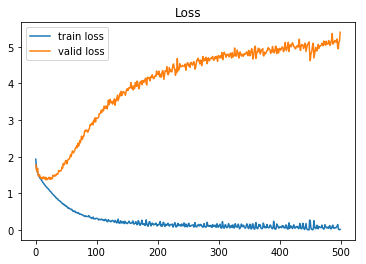

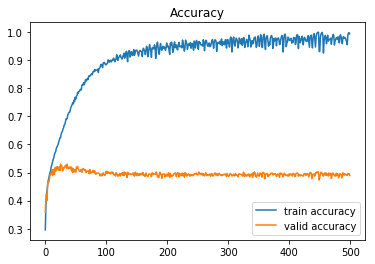

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

- 發生overfit，validation loss一直上升。

### 將Optimizer換成SGD

In [11]:
"""
Compile 模型
"""
model = build_mlp()
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [12]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 62us/step - loss: 2.2829 - acc: 0.1356 - val_loss: 2.2470 - val_acc: 0.1619
Epoch 2/500
50000/50000 [==============================] - 3s 55us/step - loss: 2.2252 - acc: 0.1773 - val_loss: 2.2033 - val_acc: 0.1939
Epoch 3/500
50000/50000 [==============================] - 3s 56us/step - loss: 2.1829 - acc: 0.2058 - val_loss: 2.1616 - val_acc: 0.2148
Epoch 4/500
50000/50000 [==============================] - 3s 57us/step - loss: 2.1433 - acc: 0.2295 - val_loss: 2.1251 - val_acc: 0.2366
Epoch 5/500
50000/50000 [==============================] - 3s 68us/step - loss: 2.1087 - acc: 0.2502 - val_loss: 2.0915 - val_acc: 0.2598
Epoch 6/500
50000/50000 [==============================] - 3s 69us/step - loss: 2.0761 - acc: 0.2724 - val_loss: 2.0603 - val_acc: 0.2773
Epoch 7/500
50000/50000 [==============================] - 3s 58us/step - loss: 2.0456 - acc: 0.2875 - val_loss: 2.0301 - 

50000/50000 [==============================] - 4s 70us/step - loss: 1.6485 - acc: 0.4213 - val_loss: 1.6501 - val_acc: 0.4160
Epoch 60/500
50000/50000 [==============================] - 3s 70us/step - loss: 1.6454 - acc: 0.4215 - val_loss: 1.6469 - val_acc: 0.4205
Epoch 61/500
50000/50000 [==============================] - 4s 70us/step - loss: 1.6422 - acc: 0.4230 - val_loss: 1.6448 - val_acc: 0.4190
Epoch 62/500
50000/50000 [==============================] - 3s 70us/step - loss: 1.6390 - acc: 0.4242 - val_loss: 1.6447 - val_acc: 0.4209
Epoch 63/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.6359 - acc: 0.4254 - val_loss: 1.6374 - val_acc: 0.4238
Epoch 64/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.6330 - acc: 0.4264 - val_loss: 1.6343 - val_acc: 0.4237
Epoch 65/500
50000/50000 [==============================] - 3s 70us/step - loss: 1.6298 - acc: 0.4281 - val_loss: 1.6327 - val_acc: 0.4235
Epoch 66/500
50000/50000 [==============

50000/50000 [==============================] - 3s 68us/step - loss: 1.5022 - acc: 0.4710 - val_loss: 1.5231 - val_acc: 0.4516
Epoch 118/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.4993 - acc: 0.4711 - val_loss: 1.5218 - val_acc: 0.4568
Epoch 119/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.4975 - acc: 0.4717 - val_loss: 1.5220 - val_acc: 0.4541
Epoch 120/500
50000/50000 [==============================] - 4s 78us/step - loss: 1.4951 - acc: 0.4738 - val_loss: 1.5339 - val_acc: 0.4449
Epoch 121/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.4929 - acc: 0.4732 - val_loss: 1.5238 - val_acc: 0.4528
Epoch 122/500
50000/50000 [==============================] - 3s 70us/step - loss: 1.4913 - acc: 0.4732 - val_loss: 1.5179 - val_acc: 0.4600
Epoch 123/500
50000/50000 [==============================] - 4s 70us/step - loss: 1.4886 - acc: 0.4758 - val_loss: 1.5176 - val_acc: 0.4579
Epoch 124/500
50000/50000 [=======

50000/50000 [==============================] - 4s 71us/step - loss: 1.3893 - acc: 0.5105 - val_loss: 1.4446 - val_acc: 0.4859
Epoch 176/500
50000/50000 [==============================] - 4s 70us/step - loss: 1.3868 - acc: 0.5100 - val_loss: 1.4667 - val_acc: 0.4702
Epoch 177/500
50000/50000 [==============================] - 4s 70us/step - loss: 1.3851 - acc: 0.5109 - val_loss: 1.4497 - val_acc: 0.4793
Epoch 178/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.3829 - acc: 0.5126 - val_loss: 1.4416 - val_acc: 0.4843
Epoch 179/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.3810 - acc: 0.5116 - val_loss: 1.4652 - val_acc: 0.4735
Epoch 180/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.3797 - acc: 0.5122 - val_loss: 1.4532 - val_acc: 0.4806
Epoch 181/500
50000/50000 [==============================] - 4s 70us/step - loss: 1.3785 - acc: 0.5133 - val_loss: 1.4367 - val_acc: 0.4891
Epoch 182/500
50000/50000 [=======

50000/50000 [==============================] - 4s 72us/step - loss: 1.2956 - acc: 0.5415 - val_loss: 1.3958 - val_acc: 0.5010
Epoch 234/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.2931 - acc: 0.5426 - val_loss: 1.4175 - val_acc: 0.4994
Epoch 235/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.2912 - acc: 0.5421 - val_loss: 1.4073 - val_acc: 0.4955
Epoch 236/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.2903 - acc: 0.5442 - val_loss: 1.4147 - val_acc: 0.5000
Epoch 237/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.2901 - acc: 0.5432 - val_loss: 1.4205 - val_acc: 0.4937
Epoch 238/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.2866 - acc: 0.5450 - val_loss: 1.4002 - val_acc: 0.4940
Epoch 239/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.2853 - acc: 0.5466 - val_loss: 1.4732 - val_acc: 0.4749
Epoch 240/500
50000/50000 [=======

50000/50000 [==============================] - 4s 72us/step - loss: 1.2158 - acc: 0.5705 - val_loss: 1.3726 - val_acc: 0.5104
Epoch 292/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.2124 - acc: 0.5717 - val_loss: 1.3787 - val_acc: 0.5107
Epoch 293/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.2138 - acc: 0.5718 - val_loss: 1.3592 - val_acc: 0.5168
Epoch 294/500
50000/50000 [==============================] - 4s 70us/step - loss: 1.2106 - acc: 0.5725 - val_loss: 1.3855 - val_acc: 0.5098
Epoch 295/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.2100 - acc: 0.5717 - val_loss: 1.3601 - val_acc: 0.5131
Epoch 296/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.2067 - acc: 0.5723 - val_loss: 1.3724 - val_acc: 0.5160
Epoch 297/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.2029 - acc: 0.5730 - val_loss: 1.3932 - val_acc: 0.5045
Epoch 298/500
50000/50000 [=======

50000/50000 [==============================] - 4s 70us/step - loss: 1.1358 - acc: 0.5999 - val_loss: 1.4005 - val_acc: 0.5057
Epoch 350/500
50000/50000 [==============================] - 4s 70us/step - loss: 1.1342 - acc: 0.5991 - val_loss: 1.3623 - val_acc: 0.5127
Epoch 351/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.1371 - acc: 0.5974 - val_loss: 1.3512 - val_acc: 0.5225
Epoch 352/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.1445 - acc: 0.5962 - val_loss: 1.4342 - val_acc: 0.4980
Epoch 353/500
50000/50000 [==============================] - 3s 70us/step - loss: 1.1331 - acc: 0.5998 - val_loss: 1.4042 - val_acc: 0.5085
Epoch 354/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.1369 - acc: 0.5975 - val_loss: 1.4287 - val_acc: 0.5042
Epoch 355/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.1303 - acc: 0.5989 - val_loss: 1.3543 - val_acc: 0.5232
Epoch 356/500
50000/50000 [=======

50000/50000 [==============================] - 4s 71us/step - loss: 1.0760 - acc: 0.6190 - val_loss: 1.3617 - val_acc: 0.5176
Epoch 408/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.0731 - acc: 0.6202 - val_loss: 1.4276 - val_acc: 0.4981
Epoch 409/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.0695 - acc: 0.6221 - val_loss: 1.3934 - val_acc: 0.5124
Epoch 410/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.0611 - acc: 0.6241 - val_loss: 1.3408 - val_acc: 0.5326
Epoch 411/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.0616 - acc: 0.6240 - val_loss: 1.3473 - val_acc: 0.5280
Epoch 412/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.0608 - acc: 0.6239 - val_loss: 1.3753 - val_acc: 0.5199
Epoch 413/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.0607 - acc: 0.6238 - val_loss: 1.3619 - val_acc: 0.5219
Epoch 414/500
50000/50000 [=======

50000/50000 [==============================] - 4s 70us/step - loss: 0.9959 - acc: 0.6484 - val_loss: 1.3490 - val_acc: 0.5320
Epoch 466/500
50000/50000 [==============================] - 4s 70us/step - loss: 0.9960 - acc: 0.6471 - val_loss: 1.3386 - val_acc: 0.5354
Epoch 467/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.0019 - acc: 0.6463 - val_loss: 1.3396 - val_acc: 0.5360
Epoch 468/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.9993 - acc: 0.6459 - val_loss: 1.5371 - val_acc: 0.4860
Epoch 469/500
50000/50000 [==============================] - 4s 70us/step - loss: 1.0015 - acc: 0.6445 - val_loss: 1.4150 - val_acc: 0.5158
Epoch 470/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.9922 - acc: 0.6482 - val_loss: 1.5002 - val_acc: 0.5027
Epoch 471/500
50000/50000 [==============================] - 4s 70us/step - loss: 0.9938 - acc: 0.6479 - val_loss: 1.4031 - val_acc: 0.5194
Epoch 472/500
50000/50000 [=======

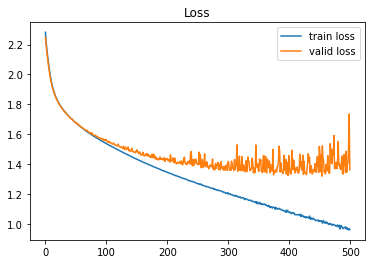

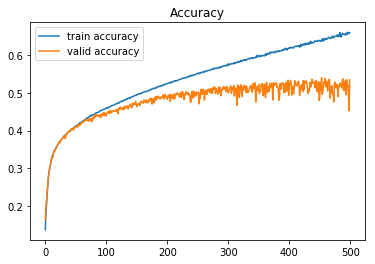

In [13]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

- 相對於使用Adam，無overfit情形，validation的表現仍然持續提昇，但整體表現應該沒有adam做early-stop時好。